<a href="https://colab.research.google.com/github/ertgrulyksk/Istanbul-Airbnb-Data-Analysis-and-Visualization/blob/main/Istanbul_Airbnb_Data_Analysis_and_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import folium
import os

In [2]:
df = pd.read_csv("AirbnbIstanbul.csv")

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,4826,The Place,6603,Kaan,NaN,Uskudar,41.05650,29.05367,Entire home/apt,554,1,1,2009-06-01,0.01,1,365
1,20815,The Bosphorus from The Comfy Hill,78838,Gülder,NaN,Besiktas,41.06984,29.04545,Entire home/apt,100,30,41,2018-11-07,0.38,2,49
2,25436,House for vacation rental furnutare,105823,Yesim,NaN,Besiktas,41.07731,29.03891,Entire home/apt,211,21,0,NaN,NaN,1,83
3,27271,LOVELY APT. IN PERFECT LOCATION,117026,Mutlu,NaN,Beyoglu,41.03220,28.98216,Entire home/apt,237,5,2,2018-05-04,0.04,1,228
4,28277,Duplex Apartment with Terrace,121607,Alen,NaN,Sisli,41.04471,28.98567,Entire home/apt,591,3,0,NaN,NaN,13,356


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16251 entries, 0 to 16250
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              16251 non-null  int64  
 1   name                            16160 non-null  object 
 2   host_id                         16251 non-null  int64  
 3   host_name                       16244 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   16251 non-null  object 
 6   latitude                        16251 non-null  float64
 7   longitude                       16251 non-null  float64
 8   room_type                       16251 non-null  object 
 9   price                           16251 non-null  int64  
 10  minimum_nights                  16251 non-null  int64  
 11  number_of_reviews               16251 non-null  int64  
 12  last_review                     

In [5]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [6]:
df.isnull().sum()

id                                    0
name                                 91
host_id                               0
host_name                             7
neighbourhood_group               16251
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                        8484
reviews_per_month                  8484
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [7]:
df.drop(columns="neighbourhood_group", inplace = True)
df.drop(columns="last_review", inplace = True)

In [8]:
df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,4826,The Place,6603,Kaan,Uskudar,41.05650,29.05367,Entire home/apt,554,1,1,0.01,1,365
1,20815,The Bosphorus from The Comfy Hill,78838,Gülder,Besiktas,41.06984,29.04545,Entire home/apt,100,30,41,0.38,2,49
2,25436,House for vacation rental furnutare,105823,Yesim,Besiktas,41.07731,29.03891,Entire home/apt,211,21,0,NaN,1,83
3,27271,LOVELY APT. IN PERFECT LOCATION,117026,Mutlu,Beyoglu,41.03220,28.98216,Entire home/apt,237,5,2,0.04,1,228
4,28277,Duplex Apartment with Terrace,121607,Alen,Sisli,41.04471,28.98567,Entire home/apt,591,3,0,NaN,13,356


In [9]:
df["reviews_per_month"].fillna(0, inplace=True)

In [10]:
df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,4826,The Place,6603,Kaan,Uskudar,41.05650,29.05367,Entire home/apt,554,1,1,0.01,1,365
1,20815,The Bosphorus from The Comfy Hill,78838,Gülder,Besiktas,41.06984,29.04545,Entire home/apt,100,30,41,0.38,2,49
2,25436,House for vacation rental furnutare,105823,Yesim,Besiktas,41.07731,29.03891,Entire home/apt,211,21,0,0.00,1,83
3,27271,LOVELY APT. IN PERFECT LOCATION,117026,Mutlu,Beyoglu,41.03220,28.98216,Entire home/apt,237,5,2,0.04,1,228
4,28277,Duplex Apartment with Terrace,121607,Alen,Sisli,41.04471,28.98567,Entire home/apt,591,3,0,0.00,13,356


In [11]:
df["neighbourhood"].unique()

array(['Uskudar', 'Besiktas', 'Beyoglu', 'Sisli', 'Sariyer', 'Beykoz',
       'Atasehir', 'Fatih', 'Adalar', 'Kadikoy', 'Kagithane', 'Maltepe',
       'Bakirkoy', 'Esenyurt', 'Basaksehir', 'Kartal', 'Gaziosmanpasa',
       'Bahcelievler', 'Bagcilar', 'Buyukcekmece', 'Silivri',
       'Beylikduzu', 'Umraniye', 'Sile', 'Cekmekoy', 'Sancaktepe',
       'Tuzla', 'Pendik', 'Sultangazi', 'Eyup', 'Zeytinburnu',
       'Kucukcekmece', 'Avcilar', 'Gungoren', 'Catalca', 'Bayrampasa',
       'Esenler', 'Sultanbeyli', 'Arnavutkoy'], dtype=object)

In [12]:
df["neighbourhood"].value_counts()

Beyoglu          4245
Sisli            2348
Fatih            2146
Kadikoy          1717
Besiktas         1367
Uskudar           594
Esenyurt          378
Kagithane         357
Sariyer           299
Maltepe           261
Atasehir          258
Bakirkoy          197
Bahcelievler      186
Adalar            162
Pendik            144
Umraniye          136
Basaksehir        131
Eyup              126
Kartal            125
Avcilar           118
Kucukcekmece      112
Buyukcekmece      107
Bagcilar           91
Beykoz             88
Zeytinburnu        75
Beylikduzu         70
Sile               59
Gaziosmanpasa      59
Tuzla              57
Gungoren           57
Cekmekoy           42
Sancaktepe         30
Silivri            25
Sultangazi         18
Bayrampasa         18
Esenler            18
Sultanbeyli        17
Arnavutkoy          7
Catalca             6
Name: neighbourhood, dtype: int64

In [13]:
df["room_type"].unique()
df["room_type"].value_counts()

Private room       8565
Entire home/apt    7191
Shared room         495
Name: room_type, dtype: int64

In [14]:
df["host_id"].value_counts().head(10)

21907588     77
10147889     58
213157136    37
461533       29
21351250     27
2999837      25
21792167     24
189516806    23
21171234     23
1938185      21
Name: host_id, dtype: int64

Text(0, 0.5, 'Number of Listings')

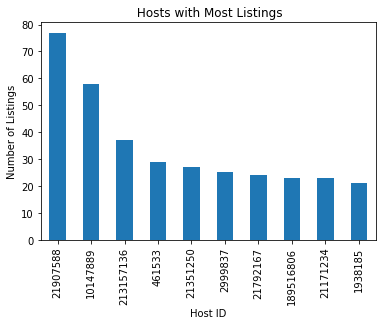

In [15]:
chart1 = df["host_id"].value_counts().head(10).plot(kind="bar")
chart1.set_title(" Hosts with Most Listings")
chart1.set_xlabel("Host ID")
chart1.set_ylabel("Number of Listings")

Text(0, 0.5, 'Number of Listings')

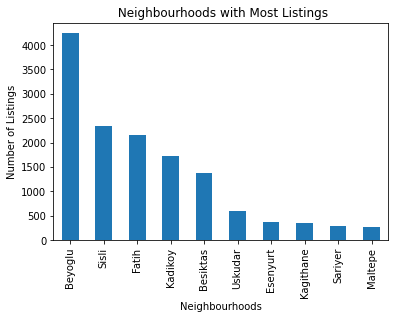

In [16]:
chart2 = df["neighbourhood"].value_counts().head(10).plot(kind="bar")
chart2.set_title(" Neighbourhoods with Most Listings")
chart2.set_xlabel("Neighbourhoods")
chart2.set_ylabel("Number of Listings")

In [17]:
neighbourhood_price = df.groupby("neighbourhood")["price"].agg(['mean'])

In [18]:
neighbourhood_price.sort_values(by='mean', ascending=False)

,mean
neighbourhood,
Kucukcekmece,1263.464286
Catalca,885.666667
Beykoz,855.977273
Sariyer,660.304348
Silivri,634.960000
Bayrampasa,596.444444
Buyukcekmece,571.140187
Arnavutkoy,533.285714
Sile,501.949153


Text(0.5, 1.0, 'Average Price of Neighbourhoods')

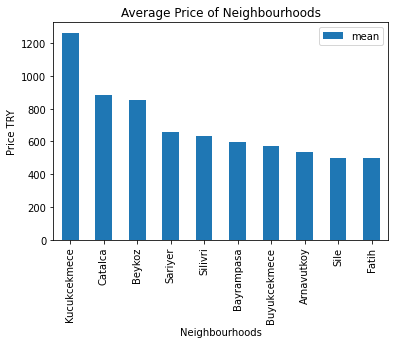

In [19]:
chart3 = neighbourhood_price.sort_values(by='mean', ascending=False).head(10).plot(kind = "bar")
chart3.set_ylabel('Price TRY')
chart3.set_xlabel('Neighbourhoods')
chart3.set_title("Average Price of Neighbourhoods")

In [20]:
most_expensive_prices = df[df.price>5000].sort_values(by="price", ascending=False).head(10)
most_expensive_prices

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
13899,30361326,3 Rooms 1 Living Room - Grand Holiday Istanbul,227944870,Ilhan,Kucukcekmece,41.03740,28.79435,Private room,59561,1,0,0.00,3,360
13900,30361470,3 Rooms 1 Living Room Dublex - Grand Holiday I...,227944870,Ilhan,Kucukcekmece,41.03841,28.79471,Private room,59561,1,0,0.00,3,331
15693,31974054,Elegance Single Room - Avicenna Hotel,166950259,Avicenna,Fatih,41.00445,28.97907,Private room,59561,1,0,0.00,4,363
8331,22119662,Gunluk kiralik daire,161593238,Leylan,Esenyurt,41.02681,28.62680,Entire home/apt,52728,5,0,0.00,1,0
12745,29257295,İstanbul town history place,20973637,Memo,Fatih,41.00850,28.96649,Private room,52243,2,3,0.75,1,359
7396,19619789,CoZy room in Beyoğlu/cihangir,36781586,Kaan,Beyoglu,41.03015,28.98064,Private room,52000,1,1,0.05,2,89
7619,20275354,İstanbul un kalbi sisli. Center of istanbul sisli,118695718,Ipek,Sisli,41.05465,28.98111,Private room,48842,2,0,0.00,1,0
3457,7016669,Private room in Beyoğlu(nice view),36781586,Kaan,Beyoglu,41.03383,28.97151,Private room,44671,1,13,0.30,2,363
7254,19235485,hmgv,134667922,Deniz,Kadikoy,40.99484,29.02976,Shared room,29786,300,0,0.00,1,364
5823,13703737,Room in the center BOMONTI,3162918,Cagatay,Sisli,41.05709,28.98525,Private room,26364,1,0,0.00,1,364


In [21]:
city_pos = [df.latitude.mean(),df.longitude.mean()]
istanbul_map = folium.Map(location=city_pos, zoom_start=10)
folium.Marker(
    location=[41.03740, 28.79435],
    popup='3 Rooms 1 Living Room - Grand Holiday Istanbul',
    icon=folium.Icon(icon='cloud')).add_to(istanbul_map)
folium.Marker(
    location=[41.03841, 28.79471],
    popup='3 Rooms 1 Living Room Dublex - Grand Holiday Istanbul',
    icon=folium.Icon(icon='cloud')).add_to(istanbul_map)
folium.Marker(
    location=[41.00445, 28.97907],
    popup='Elegance Single Room - Avicenna Hotel',
    icon=folium.Icon(icon='cloud')).add_to(istanbul_map)
folium.Marker(
    location=[41.02681, 28.62680],
    popup='Gunluk kiralik daire',
    icon=folium.Icon(icon='cloud')).add_to(istanbul_map)
folium.Marker(
    location=[41.00850, 28.96649],
    popup='Istanbul town history place ',
    icon=folium.Icon(icon='cloud')).add_to(istanbul_map)
folium.Marker(
    location=[41.03015, 28.98064],
    popup='CoZy room in Beyoğlu/cihangir',
    icon=folium.Icon(icon='cloud')).add_to(istanbul_map)
folium.Marker(
    location=[41.05465, 28.98111],
    popup='İstanbul un kalbi sisli. Center of istanbul sisli',
    icon=folium.Icon(icon='cloud')).add_to(istanbul_map)
folium.Marker(
    location=[41.03383, 28.97151],
    popup='Private room in Beyoğlu(nice view)',
    icon=folium.Icon(icon='cloud')).add_to(istanbul_map)
folium.Marker(
    location=[40.99484, 29.02976],
    popup='hmgv',
    icon=folium.Icon(icon='cloud')).add_to(istanbul_map)
folium.Marker(
    location=[41.05709, 28.98525],
    popup='Room in the center BOMONTI',
    icon=folium.Icon(icon='cloud')).add_to(istanbul_map)

istanbul_map

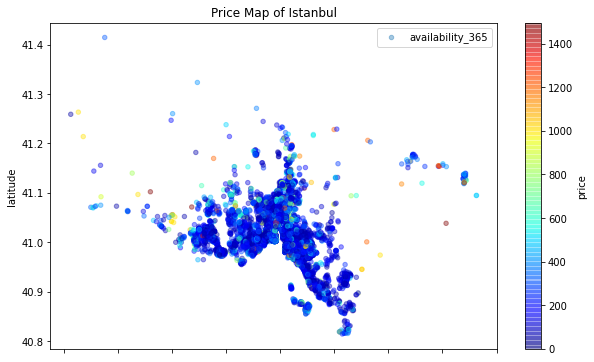

In [22]:
ave_price=df[df.price < 1500]
chart4=ave_price.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price', cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,6))
chart4.set_title('Price Map of Istanbul')
chart4.set_xlabel('longitude')
chart4.legend()

In [23]:
most_reviewed = df.nlargest(10, "number_of_reviews")
most_reviewed

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
652,1092753,"The Atatürk Airport, 5 minutes",6003668,Melik Fırat,Bahcelievler,40.99240,28.83904,Private room,153,1,307,4.39,3,362
469,847765,Sweet Flat in Cihangir Cukurcuma,2769925,Pelin,Beyoglu,41.03358,28.98310,Entire home/apt,153,2,276,3.74,7,127
891,1589084,Sultanahmet Gardens: Double Suite,923172,Tansel,Fatih,41.00314,28.97802,Entire home/apt,316,1,272,4.12,2,331
334,703593,Perfect Located HOUSE Cihangir BEYOGLU,2769925,Pelin,Beyoglu,41.02976,28.98159,Entire home/apt,153,2,267,3.48,7,79
1486,3093528,Comfortable Apartment Sultanahmet,15732904,Ozan Özgür,Fatih,41.00689,28.96987,Entire home/apt,216,2,264,4.62,2,195
3204,6549527,Spectacular view and Bright apartment,34255768,Osman,Beyoglu,41.03006,28.98006,Entire home/apt,322,1,253,5.73,1,201
3274,6664471,Charming apartment in Sultanahmet,17975030,Hikmet,Fatih,41.00661,28.96972,Entire home/apt,195,1,251,5.61,9,322
1550,3237666,cozy room in Taksim Istanbul,2475490,Ceylan,Beyoglu,41.03397,28.98620,Private room,148,1,248,4.48,4,86
227,555588,Historical Istanbul House @ Taksim,2731976,Alexis,Sisli,41.04251,28.98788,Entire home/apt,243,3,246,3.08,2,258
348,718917,Fancy Flat near Taksim Square (7),1605466,Kerem,Beyoglu,41.03862,28.98308,Entire home/apt,179,1,240,4.18,13,312


In [24]:
price_avrg=most_reviewed.price.mean()
print('Average price per night: {}'.format(price_avrg))

Average price per night: 207.8


In [25]:
df[df["host_id"]==21907588].head(5)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
2095,4221645,Cosy studio flat w/ kitchenette,21907588,Alihan,Fatih,41.00630,28.96519,Entire home/apt,105,60,40,0.77,77,266
2254,4584562,** Amazing room w/private bath in Sultanahmet,21907588,Alihan,Fatih,41.00237,28.97515,Private room,100,1,18,0.36,77,358
2255,4584867,** Deniz Houses Hotel-Double room Sultanahmet,21907588,Alihan,Fatih,41.00207,28.97373,Private room,105,1,115,2.30,77,359
2262,4594357,** Sea view room w/balcony in Sultanahmet,21907588,Alihan,Fatih,41.00381,28.97516,Private room,185,1,20,0.43,77,357
2271,4627130,*** Naz Wooden House Inn - old city of Istanbul,21907588,Alihan,Fatih,41.00417,28.97923,Private room,127,1,101,2.00,77,341
